<a href="https://colab.research.google.com/github/HEMA1188/ML_Project/blob/main/Cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cancer=pd.read_csv("cancer.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
cancer.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [5]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
cancer.drop('Unnamed: 32',axis=1, inplace=True)

In [7]:
M=cancer[cancer['diagnosis']=='M'].count()
print(M)

id                         212
diagnosis                  212
radius_mean                212
texture_mean               212
perimeter_mean             212
area_mean                  212
smoothness_mean            212
compactness_mean           212
concavity_mean             212
concave points_mean        212
symmetry_mean              212
fractal_dimension_mean     212
radius_se                  212
texture_se                 212
perimeter_se               212
area_se                    212
smoothness_se              212
compactness_se             212
concavity_se               212
concave points_se          212
symmetry_se                212
fractal_dimension_se       212
radius_worst               212
texture_worst              212
perimeter_worst            212
area_worst                 212
smoothness_worst           212
compactness_worst          212
concavity_worst            212
concave points_worst       212
symmetry_worst             212
fractal_dimension_worst    212
dtype: i

In [8]:
B=cancer.loc[cancer['diagnosis']=='B'].count()
B

id                         357
diagnosis                  357
radius_mean                357
texture_mean               357
perimeter_mean             357
area_mean                  357
smoothness_mean            357
compactness_mean           357
concavity_mean             357
concave points_mean        357
symmetry_mean              357
fractal_dimension_mean     357
radius_se                  357
texture_se                 357
perimeter_se               357
area_se                    357
smoothness_se              357
compactness_se             357
concavity_se               357
concave points_se          357
symmetry_se                357
fractal_dimension_se       357
radius_worst               357
texture_worst              357
perimeter_worst            357
area_worst                 357
smoothness_worst           357
compactness_worst          357
concavity_worst            357
concave points_worst       357
symmetry_worst             357
fractal_dimension_worst    357
dtype: i

diagnosis 
B=357
M=212 

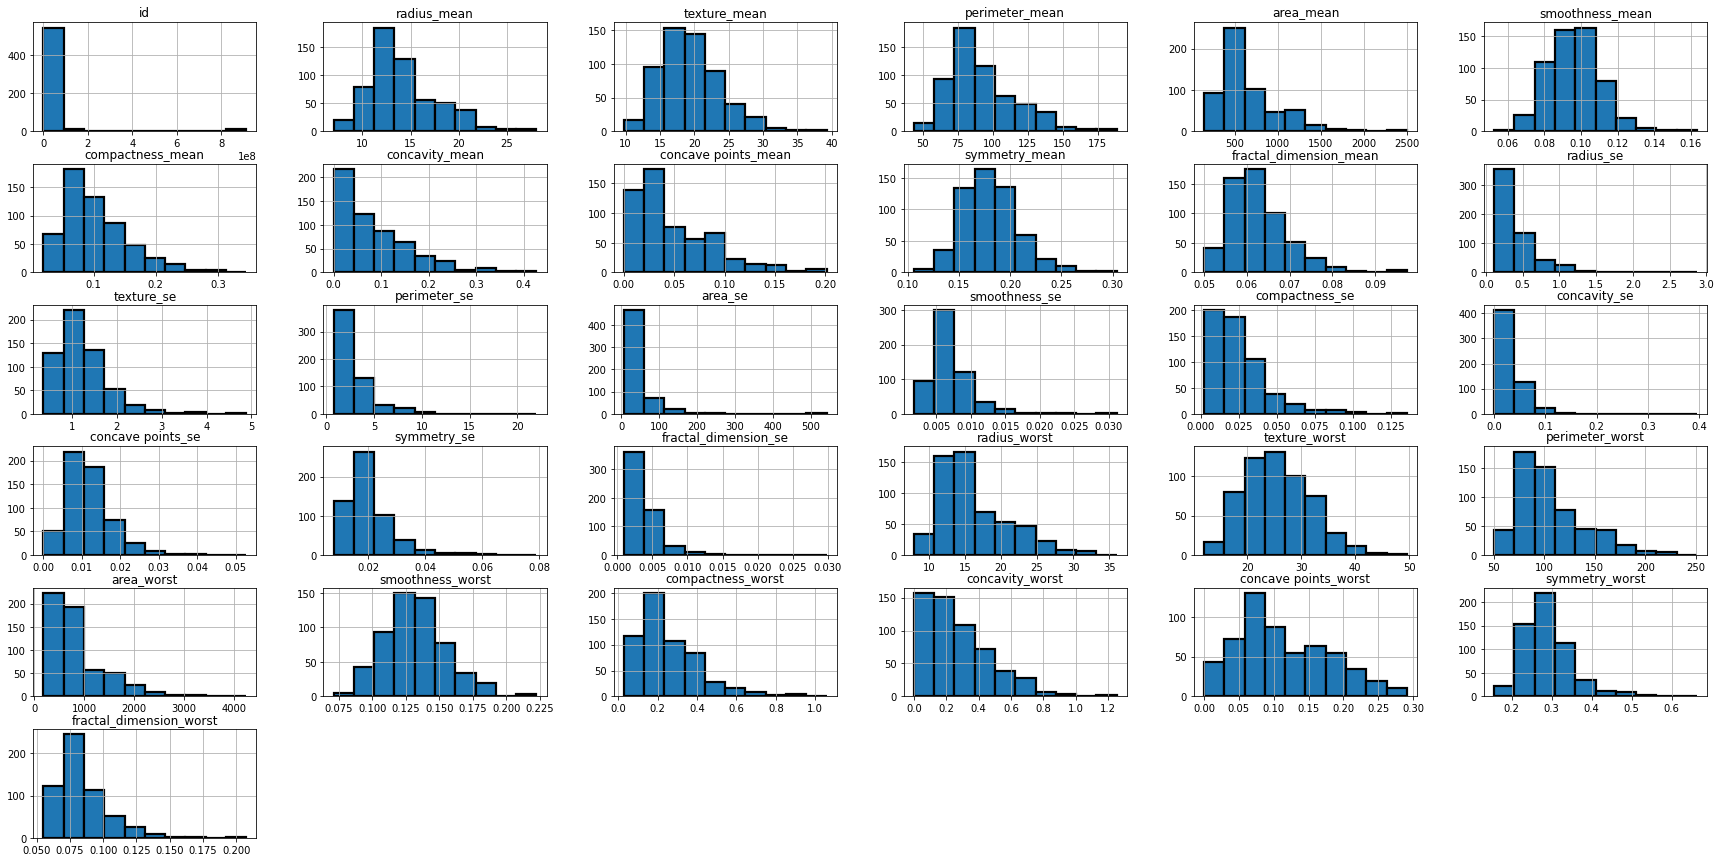

In [9]:
cancer.hist(edgecolor = 'black', linewidth = 2.2)
fig = plt.gcf()
fig.set_size_inches(30,15)
plt.show()

In [10]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
X = cancer.drop(['diagnosis'], axis=1)
Y = cancer['diagnosis']

In [13]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [14]:
cancer.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

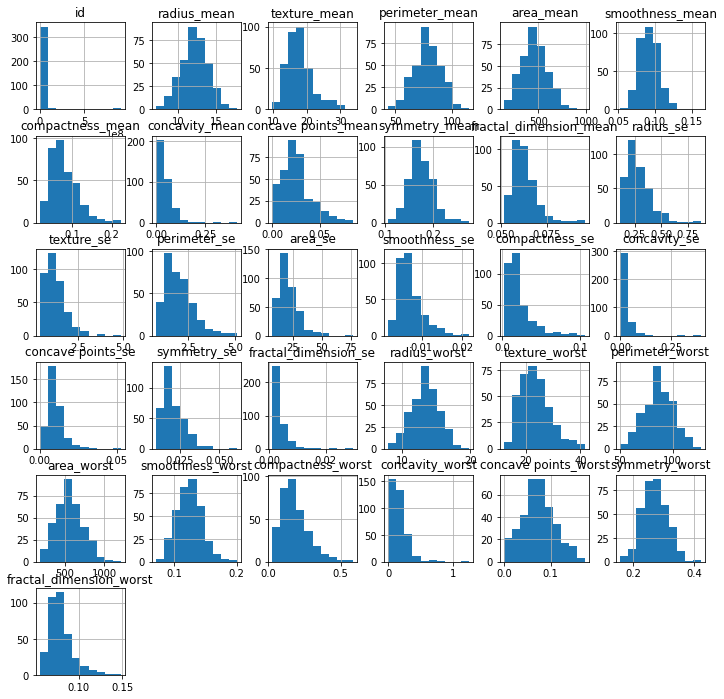

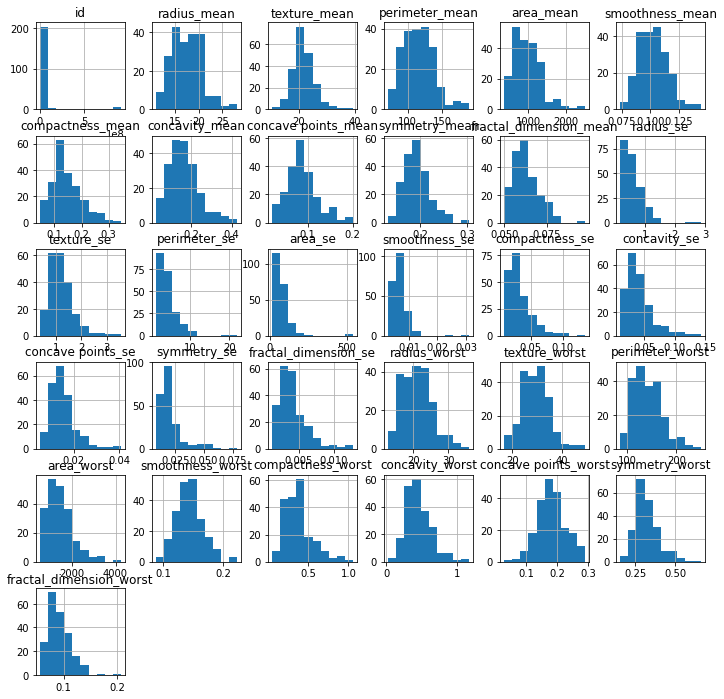

In [15]:
cancer.groupby('diagnosis').hist(figsize=(12, 12))

Attributes:=> Features

Target Variable: => 2 Diagnosis(M,B)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

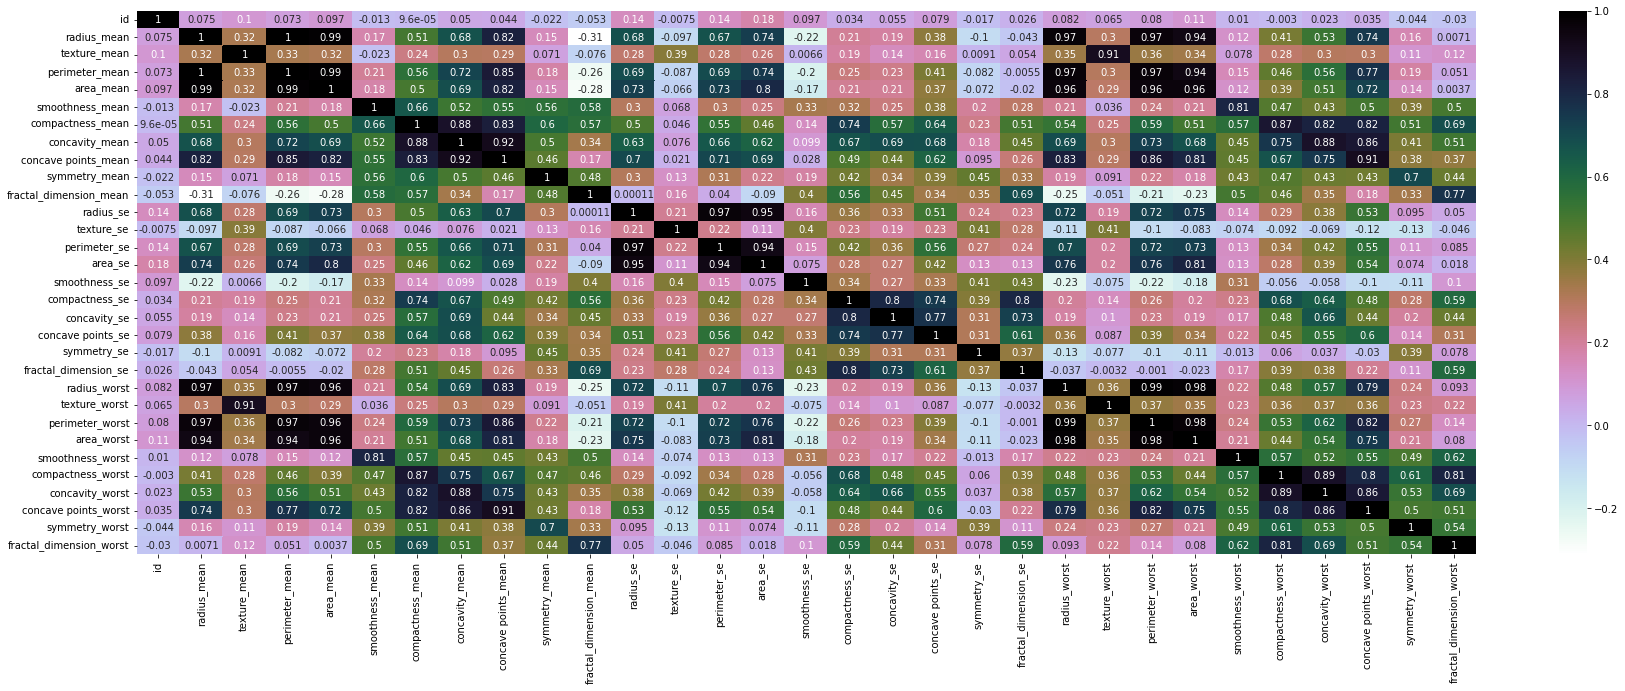

In [17]:
plt.figure(figsize= (30,10))
sns.heatmap(cancer.corr(),  annot = True,cmap= "cubehelix_r")
plt.show()

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
classifier = SVC()
classifier.fit(X_train, Y_train)
pred=classifier.predict(X_test)
print(classification_report(pred,Y_test))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [20]:
# 1.Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
pred=classifier.predict(X_test)
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        92
           1       0.96      1.00      0.98        51

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.98       143
weighted avg       0.99      0.99      0.99       143



In [21]:
#2.BaggingClassifier,
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=20,max_samples=100,max_features=0.5)
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
print(classification_report(Y_test,pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.96      0.92      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [22]:
# 3. AdaBooster Classifier
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=20)
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        90
           1       0.80      0.96      0.87        53

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.89       143
weighted avg       0.91      0.90      0.90       143



In [23]:
#4. GradientBooster
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=100)
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [24]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
print(cm)
print(cm[0,0]+cm[1,1])

[[87  3]
 [ 1 52]]
139


**Conclusion:**
In the Cancer Data using ensemble techniques **RandomForest Classification give high Accuracy Score. 0.99**